In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

### Reading data

In [3]:
data = pd.read_csv('insurance.csv')

### Shape

In [4]:
data.shape

(1338, 7)

### Data Types

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Checking missing values

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 5 point summary

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### BMI distribution

Skewness: 0.2840471105987448


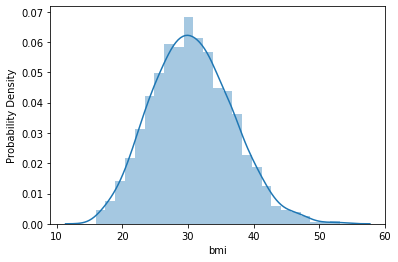

In [8]:
plt.ylabel('Probability Density')
sns.distplot(data['bmi']);
print(f"Skewness: {data['bmi'].skew()}")

### Age distribution

Skewness: 0.05567251565299186


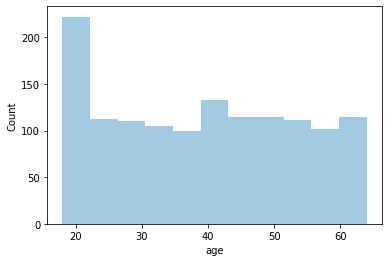

In [9]:
plt.ylabel('Count')
sns.distplot(data['age'], kde=False);
print(f"Skewness: {data['age'].skew()}")

### Charges distribution

Skewness: 1.5158796580240388


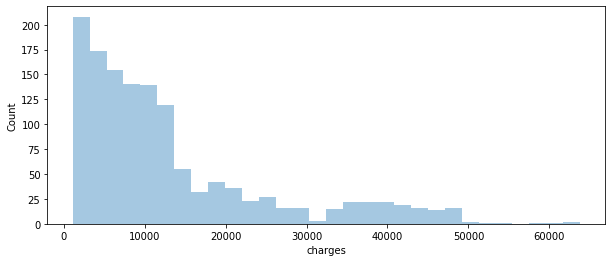

In [10]:
plt.figure(figsize=(10, 4))
plt.ylabel('Count')
sns.distplot(data['charges'], kde=False);
print(f"Skewness: {data['charges'].skew()}")

### BMI outliers

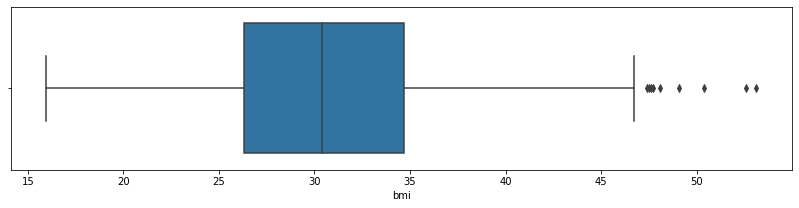

In [11]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=data['bmi']);

### Age outliers

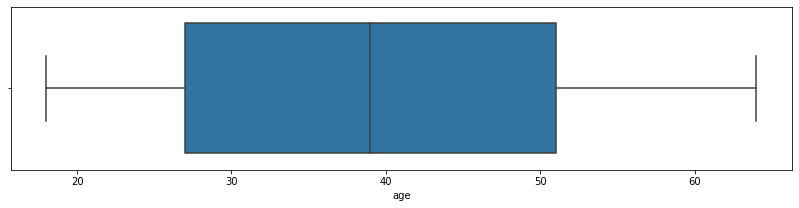

In [12]:
plt.figure(figsize=(14, 3))
sns.boxplot(data['age']);

### Charges outliers

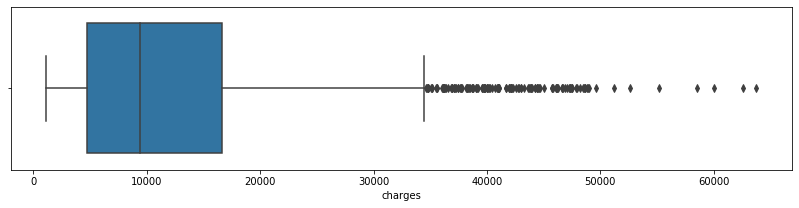

In [13]:
plt.figure(figsize=(14, 3))
sns.boxplot(data['charges']);

In [14]:
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1
noo = ((data['charges'] > Q1 + 1.5*IQR) | (data['charges'] < Q1 - 1.5*IQR)).sum()
print(f'Number of outliers = {noo}')

Number of outliers = 230


### Distribution of categorical columns (sex, smoker, region, children)

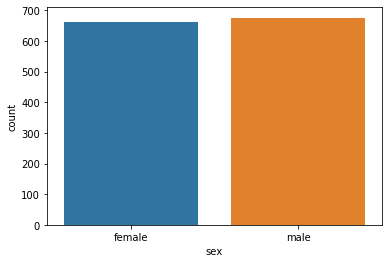

In [15]:
sns.countplot(data['sex']);

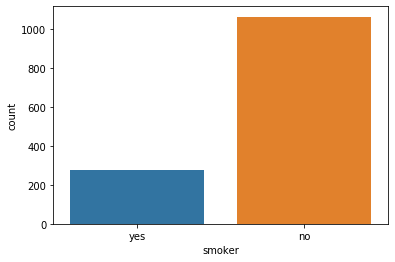

In [16]:
sns.countplot(data['smoker']);

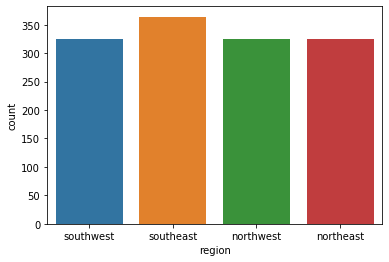

In [17]:
sns.countplot(data['region']);

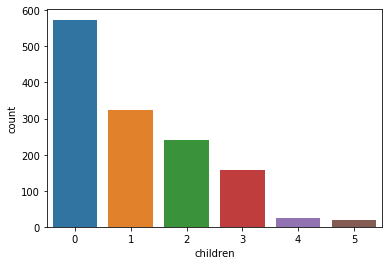

In [18]:
sns.countplot(data['children']);

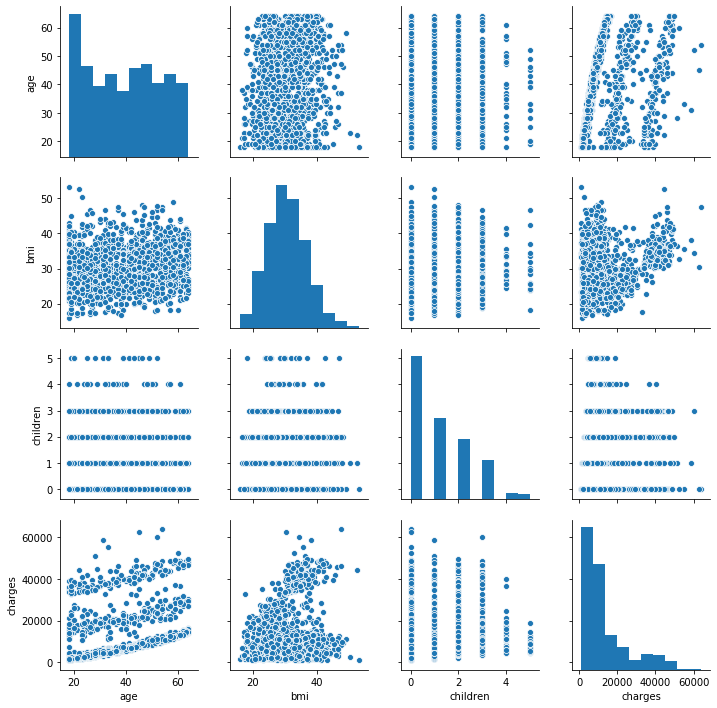

In [19]:
sns.pairplot(data);

## Do charges of people who smoke differ significantly  from the people who don't?  

In [20]:
# seperating data into smokers and non-smokers
smkr = data['smoker'] == 'yes'
n_smkr = data['smoker'] == 'no'

# smokers charges
smkr = data[smkr]['charges'].reset_index(drop=True)

# non-smokers charges
n_smkr = data[n_smkr]['charges'].reset_index(drop=True)

In [21]:
# two-sample t-test
# This test assumes the two groups have the same variance

# Null hyp(H0):      mean value of charges of both groups are equal
# Alternate hyp(H1): mean value of charges of both groups are not equal
# let alpha(significace level) to be 0.05
alpha = 0.05
t_stat, p_value = ttest_ind(smkr, n_smkr)

In [22]:
print(f't-stat: {t_stat}\np-value: {p_value}\nalpha: {alpha}')

t-stat: 46.664921172723716
p-value: 8.271435842177219e-283
alpha: 0.05


In [23]:
# Since the obtained p-value < alpha
# we should reject our H0 and accept H1
# charges of people who smoke differ significantly from the people who don't.

##  Does bmi of males differ significantly from that of  females?  

In [24]:
# seperating data into males and females
male = data['sex'] == 'male'
female = data['sex'] == 'female'

# group1-male BMI
male = data[male]['bmi'].reset_index(drop=True)

# group2-female BMI
female = data[female]['bmi'].reset_index(drop=True)

In [25]:
# two-sample t-test
# This test assumes the two groups have the same variance

# Null hyp(H0):      mean value of BMI of both groups are equal
# Alternate hyp(H1): mean value of BMI of both groups are not equal
# let alpha(significace level) to be 0.05
alpha = 0.05
t_stat, p_value = ttest_ind(male, female)

In [26]:
print(f't-stat: {t_stat}\np-value: {p_value}\nalpha: {alpha}')

t-stat: 1.696752635752224
p-value: 0.08997637178984932
alpha: 0.05


In [27]:
# Since the obtained p-value > alpha
# Hence, we fail to reject Null hyp. 
# BMI of males is equal to that of females

##  Is the proportion of smokers significantly different  in different genders?  

In [28]:
smokers = data[data['smoker'] == 'yes']['sex'].value_counts()

# Number of male and female smokers
male_smokers = smokers['male']
female_smokers = smokers['female']

# Total number of males and females in the data
n_male = data.sex.value_counts()['male']
n_female = data.sex.value_counts()['female']

In [29]:
print('[male_smokers, female_smokers] [n_male, n_female] = ', [male_smokers, female_smokers], [n_male, n_female])
print(f'\nProportion of smokers in Males, Females = {round(159/676,2)}%, {round(115/662,2)}% respectively')

[male_smokers, female_smokers] [n_male, n_female] =  [159, 115] [676, 662]

Proportion of smokers in Males, Females = 0.24%, 0.17% respectively


In [30]:
# z-test for proportions
# H0: Proportion of smokers is same in males and females
# H1: Proportion of smokers differ in males and females
# let alpha be 0.05
alpha = 0.05

In [31]:
z_stat, p_val = proportions_ztest([male_smokers, female_smokers], [n_male, n_female])

In [32]:
if p_val < alpha:
    print(f'With a p-value of {round(p_val,4)} the difference is significant. We reject the null')
else:
    print(f'With a p-value of {round(p_val,4)} the difference is not significant. We fail to reject the null')

With a p-value of 0.0053 the difference is significant. We reject the null


## Is the distribution of bmi across women with no  children, one child and two children, the same ? 


#### One-way ANOVA
* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: Atleast one $\mu$ differs

#### Assuming

* 1) All populations involved follow a normal distribution
* 2) All populations have the same variance
* 3) The samples are randomly selected and independent of one another


#### Let the significance level(alpha) be 0.05

In [33]:
alpha = 0.05

In [34]:
# filtering out data containing 0, 1 or 2 children
d_filtered = data[data['children'].isin([0, 1, 2])]

#### Variable $children$ is of type $int$, in order to perform ANOVA we need to change it's type to $categotical$.

In [37]:
# changing int to categorical
d_filtered.children = d_filtered.children.astype('category')

In [36]:
mod = ols('bmi ~ children', data=d_filtered).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
children     31.631915     2.0  0.416983  0.659133
Residual  43049.991501  1135.0       NaN       NaN


#### P-value came out to be 0.6591, which is greator than alpha = 0.05.
#### Hence, we shall accept the Null Hyp.
#### The distribution of bmi across women with no  children, one child and two children is same. ($\mu1$ = $\mu2$ = $\mu3$)